# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

#### 1. Import the student hours and scores dataset.


In [ ]:
import pandas as pd # type: ignore
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### 2. Is this task a multiple or a simple linear regression problem?


Simple Linear regression because: number of features is: $2$

#### 3. Which variable represents the dependent variable, and which one represents the independent variable?


#### 4. Display the number of samples and features in the dataset.


In [2]:
print(f'number of samples: {len(dataset)}')
print(f'number of features: {len(dataset.columns)}')

number of samples: 25
number of features: 2


#### 5. Display the information about the dataset features.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


#### 6. Describe the features by displaying their statistics.


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### 7. Plot the data and observe whether it demonstrates linear separability.

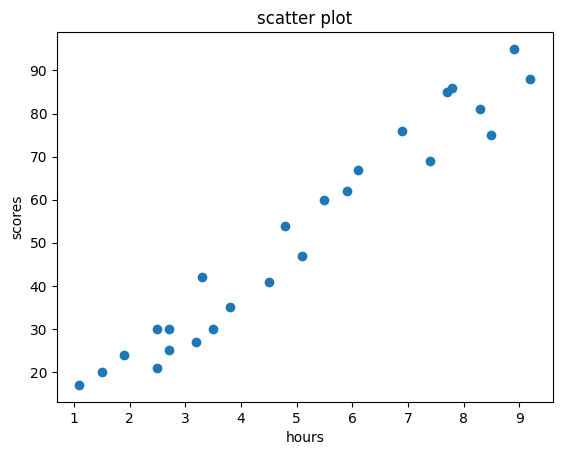

In [ ]:
import matplotlib.pyplot as plt # type: ignore
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('scatter plot')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

In [7]:
%pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

#### 1. Split the dataset into training and testing sets.


In [8]:
from sklearn.model_selection import train_test_split # type: ignore

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#### 2. Train the data using the LinearRegression module from sklearn. 


In [9]:
from sklearn.linear_model import LinearRegression  # type: ignore

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print(f"beta_1 = {linear_regression.coef_[0]} \nbeta_0 = {linear_regression.intercept_}")

beta_1 = 9.690624690624697 
beta_0 = 2.5069547569547197


#### 3. Display the model's equation.


#### 4. Create a plot showing the data and the generated model.


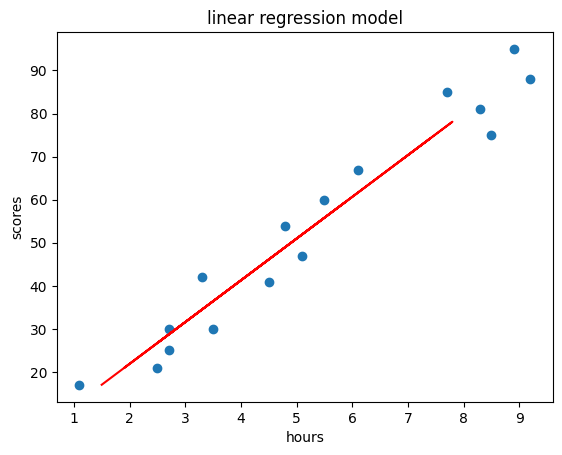

In [10]:
y_predict = linear_regression.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test, y_predict , color='red')
plt.title('linear regression model')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

#### 5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?


In [12]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error, mean_absolute_error, r2_score # type: ignore
mae= mean_absolute_error(y_true= y_test, y_pred= y_predict)
mse= mean_squared_error(y_true= y_test, y_pred= y_predict)
rmse = root_mean_squared_error(y_true= y_test, y_pred= y_predict)
r_square= r2_score(y_true= y_test, y_pred= y_predict)

print(f"MEA = {mae}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"R² = {r_square}")

MEA = 4.691397441397446
MSE = 25.463280738222593
RMSE = 5.046115410711748
R² = 0.9555700801388128


#### 6. Describe the R-squared metric and its advantages compared to the other metrics.


#### 7. Is the generated model characterized by good performance?


#### 8. Create a plot visualizing the difference between actual and predicted values.

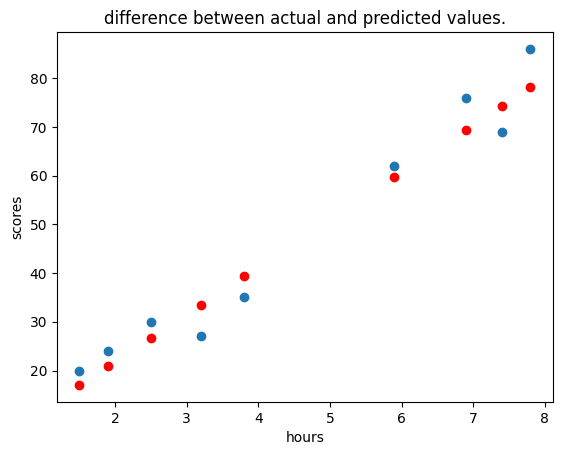

In [21]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_predict, color= "red")
plt.title('difference between actual and predicted values.')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

#### 1. Import the Boston Housing dataset.

In [14]:
dataset2 = pd.read_csv('HousingData.csv')
dataset2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
dataset2.shape

(506, 14)

In [16]:
dataset2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### 2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.


In [17]:
dataset_corr = dataset2.corr()
dataset_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.40,-0.05,0.42,-0.22,0.35,-0.37,0.62,0.58,0.28,-0.38,0.44,-0.39
ZN,-0.19,1.00,-0.53,-0.04,-0.51,0.32,-0.56,0.66,-0.31,-0.31,-0.41,0.17,-0.41,0.37
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.73,0.39,-0.36,0.59,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.08,0.10,0.08,-0.09,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.42,-0.51,0.76,0.08,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.58,-0.43
RM,-0.22,0.32,-0.39,0.10,-0.30,1.00,-0.25,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.56,0.64,0.08,0.73,-0.25,1.00,-0.74,0.46,0.51,0.27,-0.28,0.60,-0.39
DIS,-0.37,0.66,-0.71,-0.09,-0.77,0.21,-0.74,1.00,-0.49,-0.53,-0.23,0.29,-0.49,0.25
RAD,0.62,-0.31,0.60,0.00,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.48,-0.38
TAX,0.58,-0.31,0.73,-0.03,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


we notice that the columns: RM and LSTAT re hightly correlated with MEDV
$$ |\text{corr}(\text{RM}, \text{MEDV})| = 0.7 > 0.6 \\ |\text{corr}(\text{LSTAT}, \text{MEDV})| = 0.74 > 0.6 $$

In [18]:
dataset_corr = dataset_corr['MEDV'].sort_values(ascending=False)

In [19]:
high_corr_features = dataset_corr[abs(dataset_corr) >= 0.6].index
high_corr_features

Index(['MEDV', 'RM', 'LSTAT'], dtype='object')

#### 3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.


Text(0.5, 0.92, '3D Plot of RM, LSTAT, and MEDV')

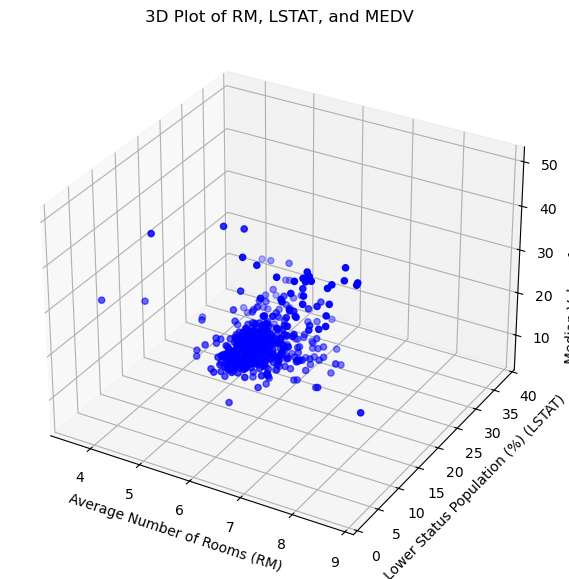

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # type: ignore

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset2['RM'], dataset2['LSTAT'], dataset2['MEDV'], c='b', marker='o')
ax.set_xlabel('Average Number of Rooms (RM)')
ax.set_ylabel('Lower Status Population (%) (LSTAT)')
ax.set_zlabel('Median Value of Homes (MEDV)')
ax.set_title('3D Plot of RM, LSTAT, and MEDV')



In [22]:
selected_features = high_corr_features.drop('MEDV')
selected_features

Index(['RM', 'LSTAT'], dtype='object')

In [23]:
dataset2[selected_features].isna().sum() 

RM        0
LSTAT    20
dtype: int64

In [24]:
for feature in selected_features:
    dataset2[feature] = dataset2[feature].fillna(dataset2[feature].mean())
dataset2[selected_features].isna().sum()  

RM       0
LSTAT    0
dtype: int64

#### 4. Split the generated dataset.


In [25]:
X = dataset2[selected_features]
y = dataset2['MEDV']
X, y

(        RM      LSTAT
 0    6.575   4.980000
 1    6.421   9.140000
 2    7.185   4.030000
 3    6.998   2.940000
 4    7.147  12.715432
 ..     ...        ...
 501  6.593  12.715432
 502  6.120   9.080000
 503  6.976   5.640000
 504  6.794   6.480000
 505  6.030   7.880000
 
 [506 rows x 2 columns],
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: MEDV, Length: 506, dtype: float64)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5. Normalize the data (excluding the label) using the min max scaler strategy.

In [27]:
from sklearn.preprocessing import MinMaxScaler # type: ignore

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test

(array([[0.29306488, 0.63962472],
        [0.40085418, 0.18598234],
        [0.44091926, 0.1683223 ],
        [0.45556233, 0.59492274],
        [0.37909294, 0.26352097],
        [0.52226968, 0.09243929],
        [0.44213952, 0.17328918],
        [0.51250763, 0.11147903],
        [0.46552776, 0.68211921],
        [0.60789099, 0.49806843],
        [0.49766118, 0.13852097],
        [0.46390075, 0.21302428],
        [0.67114094, 0.12775938],
        [0.47691682, 0.37086093],
        [0.79357332, 0.16087196],
        [0.35306081, 0.40783664],
        [0.37502542, 0.28366446],
        [0.53243848, 0.12775938],
        [0.35184055, 0.29718543],
        [0.53365874, 0.11506623],
        [0.42586943, 0.52124724],
        [0.4388855 , 0.23647903],
        [0.46898515, 0.11258278],
        [0.44295302, 0.1647351 ],
        [0.53955664, 0.12775938],
        [0.66951393, 0.0852649 ],
        [0.46552776, 0.36672185],
        [0.804759  , 0.05601545],
        [0.35590807, 0.7044702 ],
        [0.502

### Data training and evaluation

<div class="alert alert-block alert-danger">
1. Use the following lines of code to perform training on the Boston Housing dataset.
<div/>

In [28]:
from sklearn.linear_model import SGDRegressor # type: ignore

learning_rates = [0.01, 0.001, 0.0001]
losses_dict = {}

models = {}

for rate in learning_rates:
  sgdr = SGDRegressor(learning_rate='invscaling', eta0=rate,max_iter=1000,verbose=1)
  models[rate] = sgdr
  losses = []
  for _ in range(1000):
    sgdr.partial_fit(X_train, y_train)
    y_train_pred = sgdr.predict(X_train)
    loss = mean_squared_error(y_train, y_train_pred)
    losses.append(loss)
  losses_dict[rate] = losses


-- Epoch 1
Norm: 8.20, NNZs: 2, Bias: 13.492488, T: 404, Avg. loss: 103.153203
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9.86, NNZs: 2, Bias: 15.772458, T: 404, Avg. loss: 42.979315
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 10.69, NNZs: 2, Bias: 16.567126, T: 404, Avg. loss: 37.459847
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 11.23, NNZs: 2, Bias: 16.804374, T: 404, Avg. loss: 35.665707
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 11.69, NNZs: 2, Bias: 16.885873, T: 404, Avg. loss: 34.449801
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 12.14, NNZs: 2, Bias: 16.940627, T: 404, Avg. loss: 33.397701
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 12.55, NNZs: 2, Bias: 16.906290, T: 404, Avg. loss: 32.472126
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 12.94, NNZs: 2, Bias: 16.848720, T: 404, Avg. loss: 31.612677
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 13.37, NNZs: 2, Bias: 16.863846, T: 404, Avg. loss: 30.840546
Total trai

<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    
<img src="sample.png" />

<div/>

#### 2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).

#### 3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?


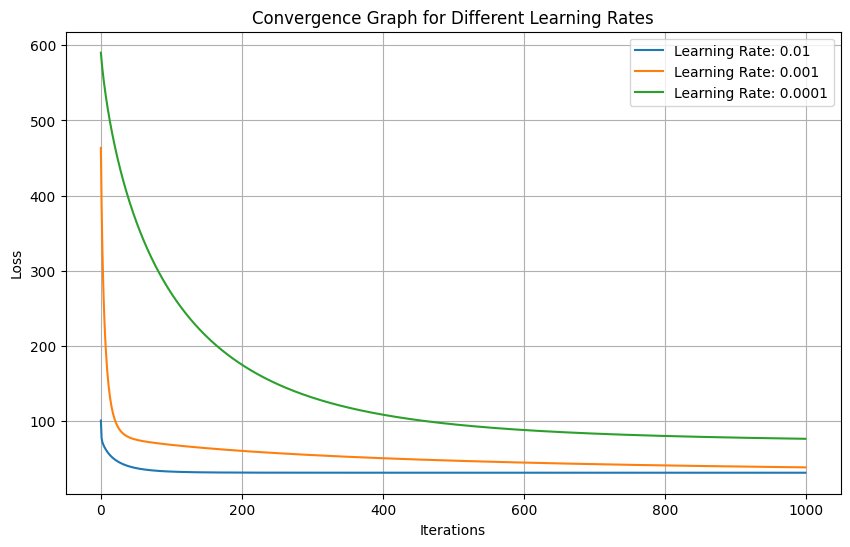

In [29]:
plt.figure(figsize=(10, 6))
for rate, losses in losses_dict.items():
    plt.plot(losses, label=f'Learning Rate: {rate}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence Graph for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

**Observations**:
- The graph for the $0.01$ learning rate shows early stopping, as it does not reach the maximum number of iterations.
- This early stopping occurs because the `tol` (tolerance) parameter controls the stopping threshold, and with a higher learning rate, the model quickly approaches the minimum, making improvements fall below `tol`.
- Setting `tol=None` or reducing tol allows the model to continue iterating further, but it risks overshooting the optimal convergence point with a high learning rate.

#### 4. Why does the graph not reach the maximum number of iterations when using the 0.01 learning rate? Which variable controls this behavior?


#### 5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.


In [30]:
for rate, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Learning Rate: {rate}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print("\n" )

Learning Rate: 0.01
MAE: 3.8864321717792247
MSE: 31.394581742090576
RMSE: 5.603086804797028
R-squared: 0.5718946931531479


Learning Rate: 0.001
MAE: 4.0176714031185
MSE: 34.78468524569226
RMSE: 5.897854291663389
R-squared: 0.5256662925783376


Learning Rate: 0.0001
MAE: 5.616009637851438
MSE: 65.91038831404514
RMSE: 8.118521313271595
R-squared: 0.1012274906102788




In [32]:
best_sgdr = models[0.01]
print(f"beta_0 = {best_sgdr.intercept_[0]:.4f}")
print(f"beta_1 = {best_sgdr.coef_[0]:.4f}")
print(f"beta_2 = {best_sgdr.coef_[1]:.4f}")

beta_0 = 15.5098
beta_1 = 27.8805
beta_2 = -22.2826


$$ y = 15.5083 \ + \ 27.8742 \cdot x_1 \ - \ 22.2857 ⋅ x_2 $$

#### 6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?


Text(0.5, 0.92, '3D Plot of RM, LSTAT, and MEDV')

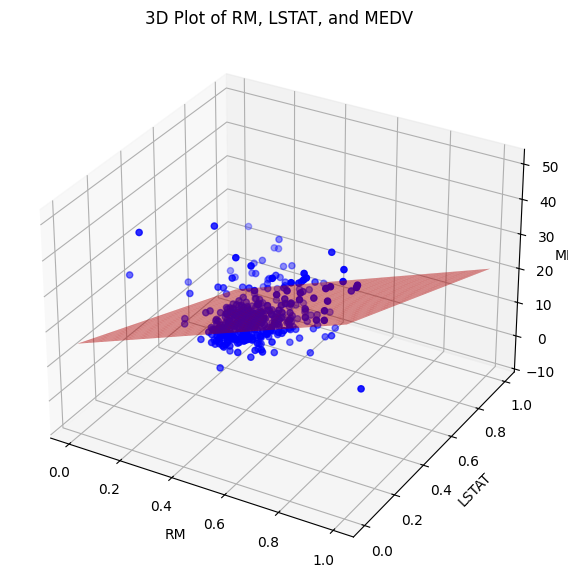

In [33]:
import numpy as np # type: ignore


Xs, Ys = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100), np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))
Zs = best_sgdr.intercept_ + Xs * best_sgdr.coef_[0] + Ys * best_sgdr.coef_[1]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='o')
ax.plot_surface(Xs, Ys, Zs, color='r', alpha=0.5)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title('3D Plot of RM, LSTAT, and MEDV')

7. Predict the class of the sample shown in the following figure based on the best model.

  
![title](sample.png)  

In [34]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
sample = [[1.13081, 0, 8.14, 0, 0.538, 5.713, 94.1, 4.233, 4, 307, 21, 360.17, 22.6]]
sample_data_df = pd.DataFrame(sample, columns=column_names)
sample_data = sample_data_df[['RM', 'LSTAT']]
sample_data = scaler.transform(sample_data)
predicted_MEDV = best_sgdr.predict(sample_data)
print(f"The predicted target (price) for the given sample is: {predicted_MEDV[0]:.4f}")

The predicted target (price) for the given sample is: 13.1676
